<a href="https://colab.research.google.com/github/kiran-bhandari16/Breast-Cancer-Prediction-Project/blob/main/end-to-end-breast-cancer-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting breast cancer using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a  machine learning model capable of predicting whether or not someone has breast cancer based on their medical attributes. 




## Preparing the tools

We are going to use pandas, matplotlib, numpy for data analysis and manipulation

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Breast-data.csv to Breast-data.csv


In [3]:
# pd.read_csv('Breast-data.csv')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For plot to appear inside the notebook
%matplotlib inline

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


#Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve


## LOAD DATA

In [5]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['Breast-data.csv']))
# # Dataset is now stored in a Pandas Dataframe
# df.shape #(rows, columns)

(698, 11)

In [6]:
df = pd.read_csv("Breast-data.csv")
df.shape

(698, 11)

# Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you working with.

1. What question(s) are you trying to solve ? 
2. What kind of data do we have and how do we treat different types ? 
3. What's missing from the data and how to deal with it ?
4. Where are the outliers and why should we care about them ? [In statistics, an outlier is a data point that differs significantly from other observations] 
5. How can you add, change or remove features to get more out of your data ? 

In [7]:
# keys in dataset
df.keys()

Index(['Sample Code Number', 'Clump Thickness', 'Uniformility of cell size',
       'Uniformility of cell shape', 'Marginal Adhesion',
       'Single Epithelial Cell', 'Bare Nuclei', 'Bland chromation',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [8]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [9]:
df.tail()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
693,776715,3,1,1,1,3,2,1,1,1,0
694,841769,2,1,1,1,2,1,1,1,1,0
695,888820,5,10,10,3,7,3,8,10,2,1
696,897471,4,8,6,4,3,4,10,6,1,1
697,897471,4,8,8,5,4,5,10,4,1,1


In [10]:
# df.drop(['Sample Code Number'], axis=1, inplace=True)
df

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,0
694,841769,2,1,1,1,2,1,1,1,1,0
695,888820,5,10,10,3,7,3,8,10,2,1
696,897471,4,8,6,4,3,4,10,6,1,1


In [11]:
print(df['Bland chromation'].unique())

[ 3  9  1  2  4  5  7  8  6 10]


In [12]:
print(df['Mitoses'].unique())
print(df['Class'].unique())

[ 1  5  4  2  3  7 10  8  6]
[0 1]


In [13]:
## Finding out how many of each class are there 

df["Class"].value_counts()

0    457
1    241
Name: Class, dtype: int64

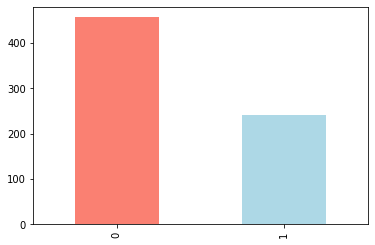

In [14]:
df["Class"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Sample Code Number          698 non-null    int64
 1   Clump Thickness             698 non-null    int64
 2   Uniformility of cell size   698 non-null    int64
 3   Uniformility of cell shape  698 non-null    int64
 4   Marginal Adhesion           698 non-null    int64
 5   Single Epithelial Cell      698 non-null    int64
 6   Bare Nuclei                 698 non-null    int64
 7   Bland chromation            698 non-null    int64
 8   Normal Nucleoli             698 non-null    int64
 9   Mitoses                     698 non-null    int64
 10  Class                       698 non-null    int64
dtypes: int64(11)
memory usage: 60.1 KB


In [16]:
## Are there any missing values ? isna() or 'isnull()' function is used to detect missing values.

df.isna().sum() 

Sample Code Number            0
Clump Thickness               0
Uniformility of cell size     0
Uniformility of cell shape    0
Marginal Adhesion             0
Single Epithelial Cell        0
Bare Nuclei                   0
Bland chromation              0
Normal Nucleoli               0
Mitoses                       0
Class                         0
dtype: int64

In [17]:
df.describe()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.510029,3.438395,2.869628,1.590258,0.345272
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,3.614579,2.440056,3.055004,1.716162,0.475798
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## Breast Cancer Frequency according to Clump Thickness

In [18]:
df.head(8)

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1
5,1018099,1,1,1,1,2,10,3,1,1,0
6,1018561,2,1,2,1,2,1,3,1,1,0
7,1033078,2,1,1,1,2,1,1,1,5,0


In [19]:
df["Clump Thickness"].value_counts()

1     145
5     129
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64

In [20]:
## Compare Class column with Clump Thickness 

pd.crosstab(df.Class, df["Clump Thickness"])

Clump Thickness,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
0,142,46,96,66,83,16,2,5,0,1
1,3,4,12,14,46,18,21,41,14,68


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

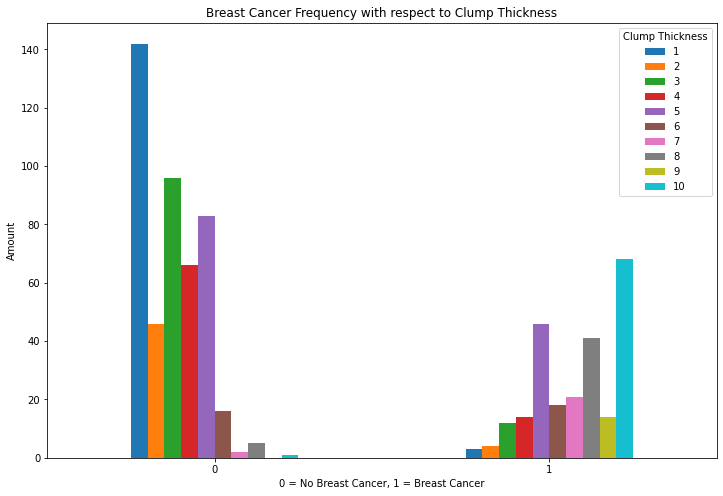

In [21]:
## Create a plot of crosstab

pd.crosstab(df["Class"], df["Clump Thickness"]).plot(kind="bar",
                                                     figsize=(12,8))

plt.title("Breast Cancer Frequency with respect to Clump Thickness")
plt.xlabel("0 = No Breast Cancer, 1 = Breast Cancer")
plt.ylabel("Amount")
plt.xticks(rotation=0)

In [22]:
## CREATING ANOTHER FIGURE 

In [23]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [24]:
df["Uniformility of cell shape"].value_counts()

1     352
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Uniformility of cell shape, dtype: int64

In [25]:
df["Marginal Adhesion"].value_counts()

1     406
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64

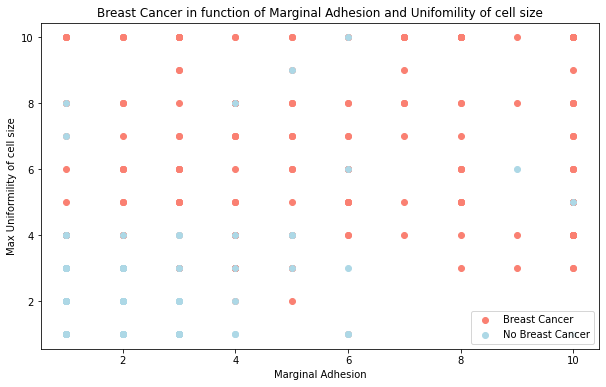

In [26]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df["Marginal Adhesion"][df["Class"]==1],
            df["Uniformility of cell size"][df["Class"]==1],
            color=["salmon"])

# Scatter with negative example 
plt.scatter(df["Marginal Adhesion"][df["Class"]==0],
            df["Uniformility of cell size"][df["Class"]==0],
            color=["lightblue"]) 

plt.title("Breast Cancer in function of Marginal Adhesion and Unifomility of cell size")
plt.xlabel("Marginal Adhesion")
plt.ylabel("Max Uniformility of cell size")
plt.legend(["Breast Cancer","No Breast Cancer"])


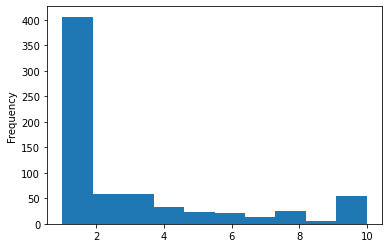

In [27]:
## Checking the distribution of Marginal Adhesion with the histogram

df["Marginal Adhesion"].plot.hist()

In [28]:
df["Normal Nucleoli"].value_counts()

1     442
10     61
3      44
2      36
8      24
6      22
5      19
4      18
9      16
7      16
Name: Normal Nucleoli, dtype: int64

In [29]:
df["Mitoses"].value_counts()

1     578
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

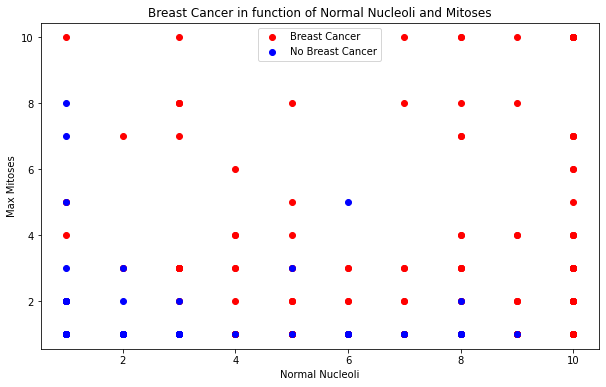

In [30]:
## findind pattern between Normal Nucleoli and Mitoses.


plt.figure(figsize=(10,6))

##Scatter with postive 
plt.scatter(df["Normal Nucleoli"][df["Class"]==1],
            df["Mitoses"][df["Class"]==1],
            color=["red"])

##Scatter with negative
plt.scatter(df["Normal Nucleoli"][df["Class"]==0],
            df["Mitoses"][df["Class"]==0],
            color=["blue"])

plt.title("Breast Cancer in function of Normal Nucleoli and Mitoses")
plt.xlabel("Normal Nucleoli")
plt.ylabel("Max Mitoses")
plt.legend(["Breast Cancer","No Breast Cancer"])


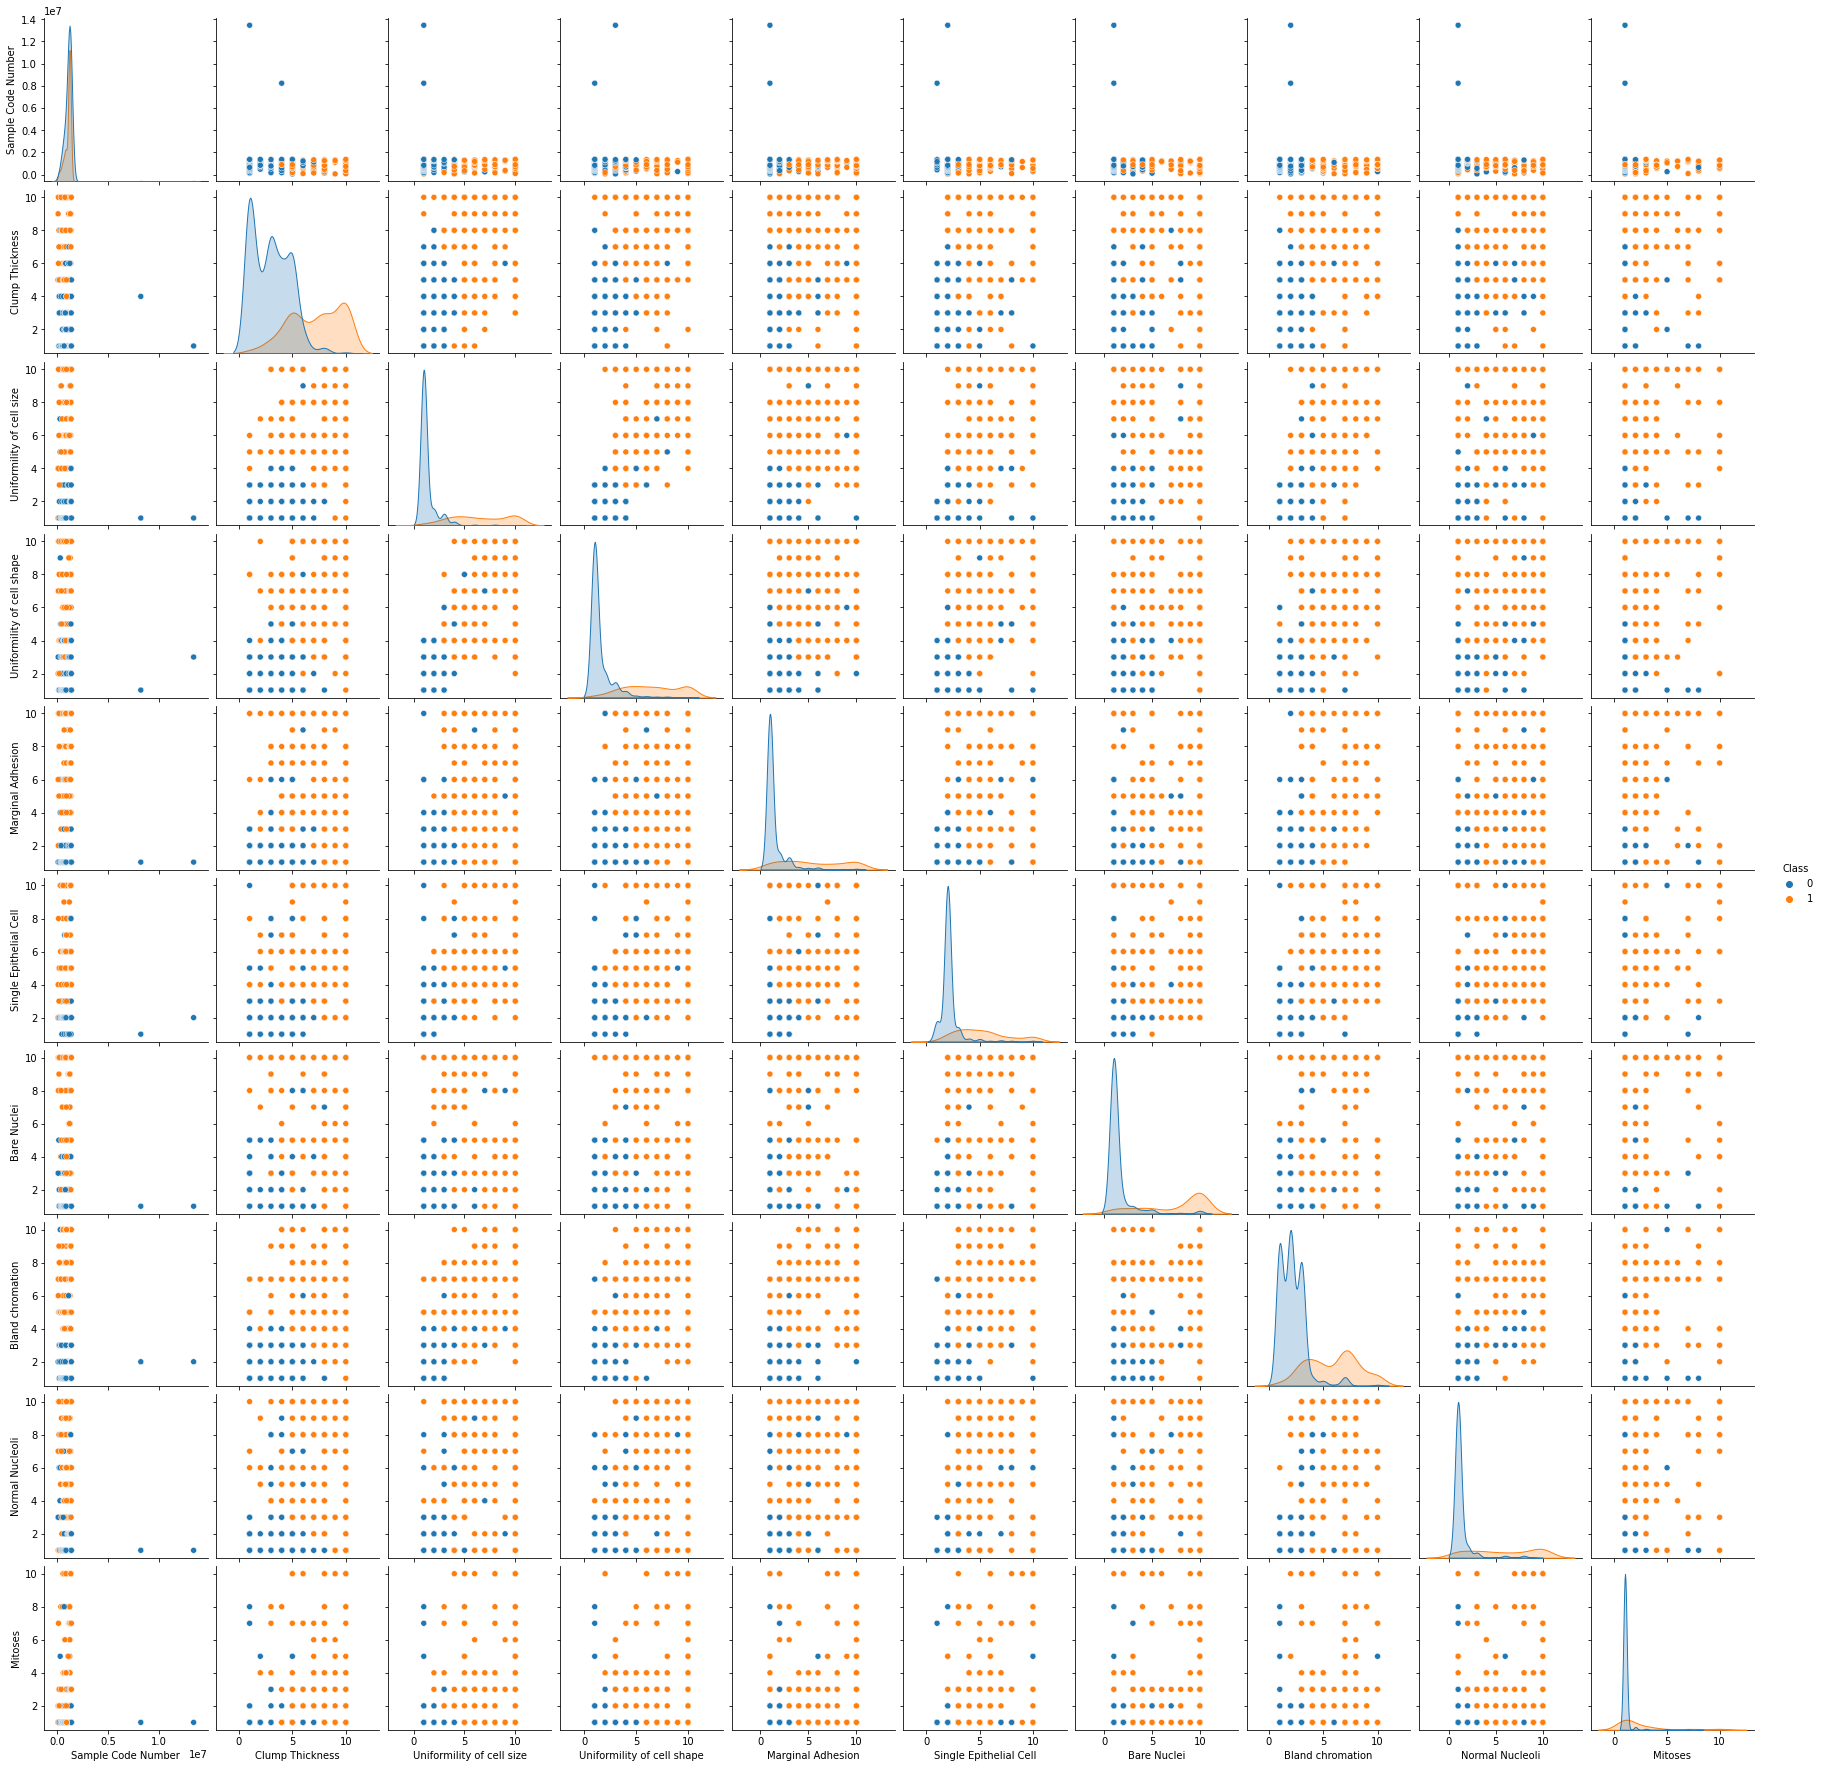

In [31]:
# Paiplot of  dataframe
sns.pairplot(df, hue = 'Class')

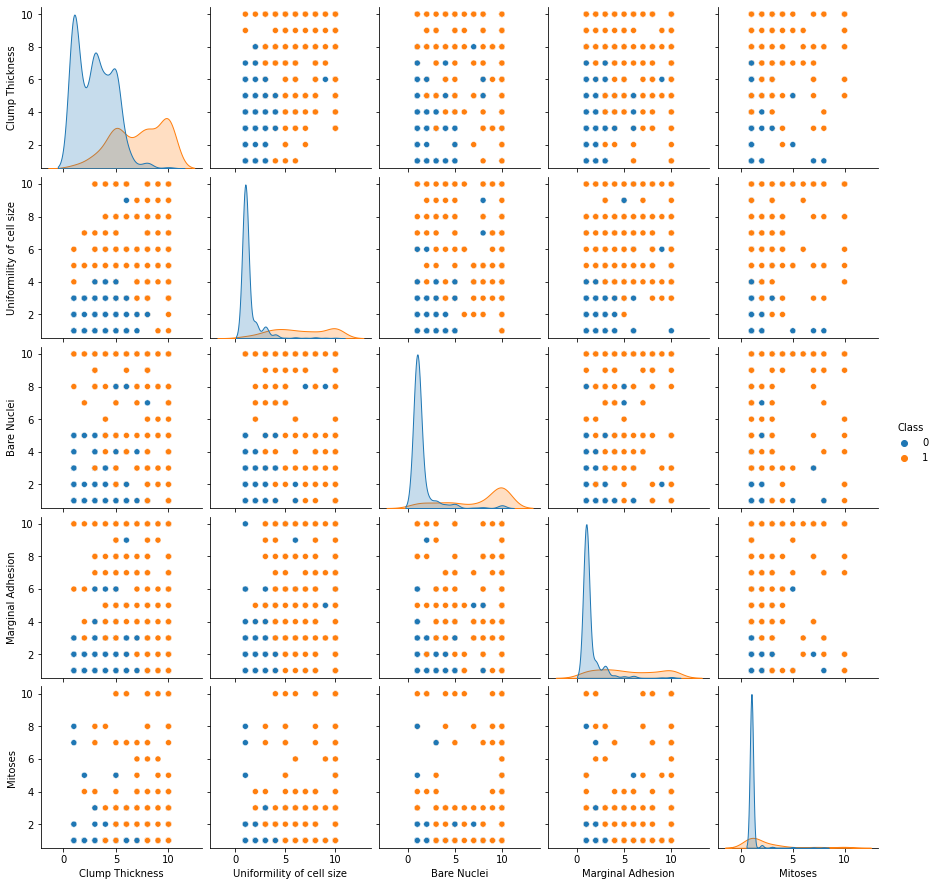

In [32]:
# pair plot of sample feature
sns.pairplot(df, hue = 'Class', 
             vars = ['Clump Thickness', 'Uniformility of cell size', 'Bare Nuclei', 'Marginal Adhesion', 'Mitoses'] )

In [33]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


Pair plot of sample feature of DataFrame

In [34]:
## Make correlation matrix 

df.corr()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
Sample Code Number,1.000000,-0.055276,-0.041735,-0.041717,-0.065003,-0.045630,-0.095440,-0.060082,-0.052188,-0.034961,-0.065038
Clump Thickness,-0.055276,1.000000,0.645366,0.655089,0.486699,0.522108,0.588496,0.558511,0.536176,0.350176,0.703666
Uniformility of cell size,-0.041735,0.645366,1.000000,0.906814,0.705397,0.751674,0.686563,0.755824,0.722699,0.458548,0.795052
Uniformility of cell shape,-0.041717,0.655089,0.906814,1.000000,0.682871,0.719524,0.707773,0.736066,0.719272,0.438756,0.787350
Marginal Adhesion,-0.065003,0.486699,0.705397,0.682871,1.000000,0.599402,0.665965,0.666759,0.603132,0.417476,0.681827
Single Epithelial Cell,-0.045630,0.522108,0.751674,0.719524,0.599402,1.000000,0.582017,0.616108,0.628704,0.478975,0.663563
Bare Nuclei,-0.095440,0.588496,0.686563,0.707773,0.665965,0.582017,1.000000,0.674422,0.575108,0.341118,0.785082
Bland chromation,-0.060082,0.558511,0.755824,0.736066,0.666759,0.616108,0.674422,1.000000,0.665914,0.344118,0.728309
Normal Nucleoli,-0.052188,0.536176,0.722699,0.719272,0.603132,0.628704,0.575108,0.665914,1.000000,0.428185,0.699236
Mitoses,-0.034961,0.350176,0.458548,0.438756,0.417476,0.478975,0.341118,0.344118,0.428185,1.000000,0.412466


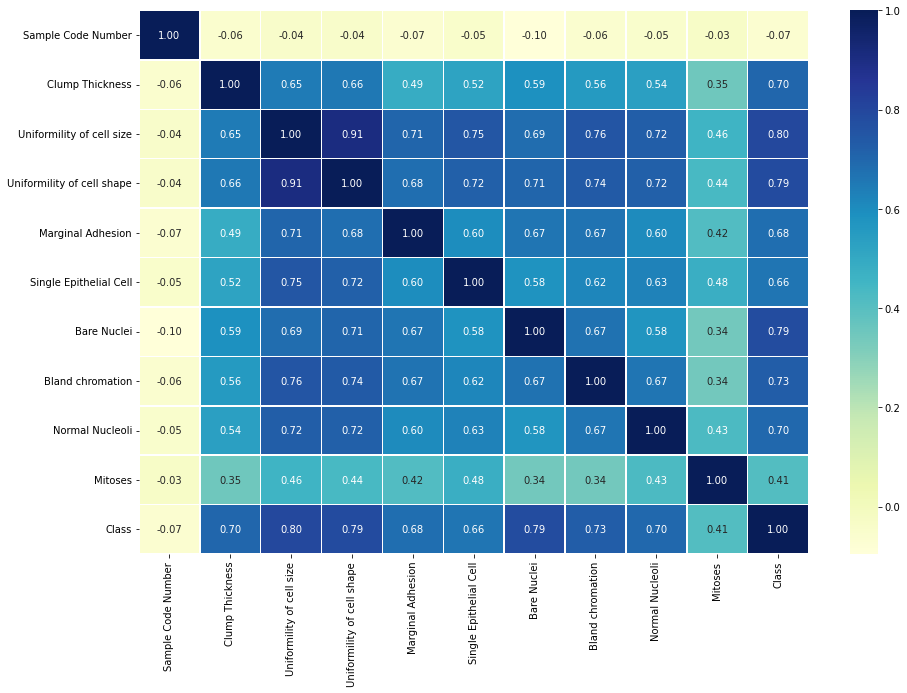

In [35]:
## making correlation matrix more understable 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax =  sns.heatmap(corr_matrix,
                  annot=True,
                  linewidth=0.5,
                  fmt=".2f",
                  cmap="YlGnBu",);

In [36]:
df["Mitoses"].value_counts()

1     578
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

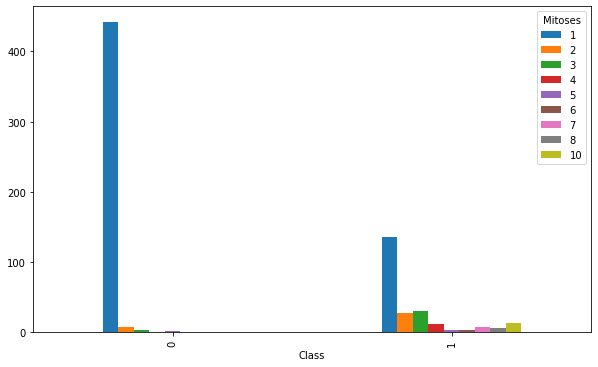

In [37]:
pd.crosstab(df["Class"],df["Mitoses"]).plot(kind="bar",
                                            figsize=(10,6))

## MODELLING

In [38]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [39]:
# Split the data into X and y
X = df.drop("Class", axis=1)  ## axis = 0 (for index) and axis=1 (for column)
y = df["Class"]

In [40]:
X

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses
0,1002945,5,4,4,5,7,10,3,2,1
1,1015425,3,1,1,1,2,2,3,1,1
2,1016277,6,8,8,1,3,4,3,7,1
3,1017023,4,1,1,3,2,1,3,1,1
4,1017122,8,10,10,8,7,10,9,7,1
...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1
694,841769,2,1,1,1,2,1,1,1,1
695,888820,5,10,10,3,7,3,8,10,2
696,897471,4,8,6,4,3,4,10,6,1


In [41]:
y

0      0
1      0
2      0
3      0
4      1
      ..
693    0
694    0
695    1
696    1
697    1
Name: Class, Length: 698, dtype: int64

In [42]:
# Split data into train and  test sets
np.random.seed(42)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [43]:
X_train

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses
82,1147044,3,1,1,1,2,2,7,1,1
51,1110102,10,3,6,2,3,5,4,10,2
220,1225799,10,6,4,3,10,10,9,10,1
559,1321942,5,1,1,1,2,1,3,1,1
544,1197527,5,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
71,1124651,1,3,3,2,2,1,7,2,1
106,1170420,1,6,8,10,8,10,5,7,1
270,411453,5,1,1,1,2,1,3,1,1
435,1295186,10,10,10,1,6,1,2,8,1


In [44]:
y_train

82     0
51     1
220    1
559    0
544    0
      ..
71     0
106    1
270    1
435    1
102    1
Name: Class, Length: 558, dtype: int64

In [45]:
X_test

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses
158,1196295,9,9,10,3,6,10,7,10,6
499,1224565,6,1,1,1,2,1,3,1,1
396,1196263,4,1,1,1,2,1,1,1,1
155,1193091,1,2,2,1,2,1,2,1,1
321,733639,3,1,1,1,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
24,1065726,5,2,3,4,2,7,3,6,1
218,1223967,6,1,3,1,2,1,3,1,1
431,1277629,5,1,1,1,2,1,2,2,1
281,488173,1,4,3,10,4,10,5,6,1



Now we have got our data split into training and test sets, it's time to build a machine learning model.

We will train it(find a patterns) on the training sets. 

And we will test it(using the patterns) on the test sets.

We are going to try 4 different machine learning models:
1. Logistice Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. Naive Bayes


In [46]:
# Put models into dictionary 

models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "Naive Bayes":GaussianNB()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test): 
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data(with no labels)
    X_test: testing data(with no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    #set random seed
    np.random.seed(42)

    # Making a dictionary to keep model scoresS
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        #Evaluate the model and  append  it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [47]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

In [48]:
model_scores

{'KNN': 0.65,
 'Logistic Regression': 0.6428571428571429,
 'Naive Bayes': 0.8714285714285714,
 'Random Forest': 0.9571428571428572}

## Model Comparison

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

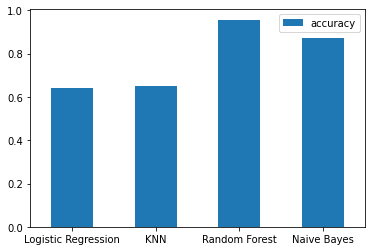

In [49]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

plt.xticks(rotation=0)


Now we've got a baseline model...  and we know a model's first prediction aren't always what we should based our next steps off. What should we do ?

Let's look at the following:
1. Hyperparameter tuning  # part of all machine learning models
2. Features importance    # part with all
3. Confusion Matrix       #from 3 to 10 concerned with Classification model 
4. Cross-Validation
5. Precision 
6. Recall
7. F1 score
8. Classification report 
9. ROC curve 
10. Area under the curve (AUC) 

## Hyperparameter Tuning(manually)

In [50]:
#Let's tune KNN

train_scores = []
test_scores = []

# Creates a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
    

In [51]:
train_scores

[1.0,
 0.8100358422939068,
 0.7849462365591398,
 0.7365591397849462,
 0.7311827956989247,
 0.7078853046594982,
 0.7060931899641577,
 0.7060931899641577,
 0.7096774193548387,
 0.7060931899641577,
 0.6935483870967742,
 0.6917562724014337,
 0.6935483870967742,
 0.6953405017921147,
 0.6971326164874552,
 0.7060931899641577,
 0.7025089605734767,
 0.6953405017921147,
 0.6935483870967742,
 0.6917562724014337]

In [52]:
test_scores

[0.6285714285714286,
 0.6571428571428571,
 0.6285714285714286,
 0.6714285714285714,
 0.65,
 0.6428571428571429,
 0.5928571428571429,
 0.6357142857142857,
 0.6071428571428571,
 0.6214285714285714,
 0.6571428571428571,
 0.6571428571428571,
 0.6357142857142857,
 0.6428571428571429,
 0.6357142857142857,
 0.6357142857142857,
 0.6285714285714286,
 0.6285714285714286,
 0.6285714285714286,
 0.6285714285714286]

Maximum KNN score on the test data: 67.14%


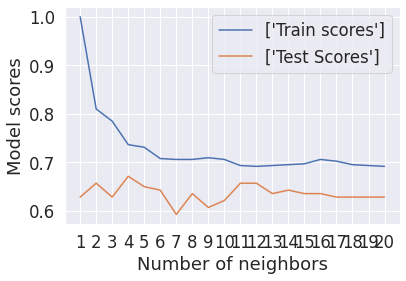

In [111]:
plt.plot(neighbors, train_scores, label=["Train scores"])
plt.plot(neighbors, test_scores, label=["Test Scores"])

plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV (CV= Cross Validated)

We will be tuning 

    1. LogisticeRegression()
    2. RandomForestClassifier()
    3. GaussianNB() 
   using RandomizedSearchCV

In [54]:
# Create hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":['liblinear']}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,80,8),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,10,2),
           "min_samples_leaf":np.arange(1,10,2)}

# Create hyperparameter grid for Naive Bayes
param_NB = {"var_smoothing":np.logspace(0,-9,100)}

Now we have got hyperparameter grids setup for each of our models,let's tune them using RandomizedSearchCV.

In [55]:
# Tune LogisticRegression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=2,
                                n_iter=20,
                                verbose=True)

#Fit random hyperparameter search model for LogisticRegression 
rs_log_reg.fit(X_train,y_train)


Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [56]:
# Find the best parameters
rs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [57]:
# Evaluate the randomized search LogisticRegression Model
rs_log_reg.score(X_test, y_test)

0.6428571428571429

Now we've tuned LogisticeRegression(), let's do the same for RandomForestClassifier(). 

In [59]:
# Tuning RandomForestClassifier

# Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=10,
                           n_iter=100,
                           verbose=True)

#Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([10, 18, 26, 34, 42, 50, 58, 66, 74])},
                   verbose=True)

In [61]:
#Find the best hyperparameters
rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 34}

In [62]:
#Evaluate the randomized search RandomForestClassifier
rs_rf.score(X_test,y_test)

0.95

Tuning the last model Naive Bayes

In [63]:
#Tuning Naive Bayes

#Setup the random seed
np.random.seed(42)

#Setup the random hyperparameter search for NaiveBayed
rs_nb = RandomizedSearchCV(GaussianNB(),
                           param_distributions=param_NB,
                           cv=2,
                           n_iter=100,
                           verbose=True)

#Fit random hyperparameter search model for NaiveBayes
rs_nb.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=GaussianNB(), n_iter=100,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511191...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=True)

In [64]:
#Finding the best hyperparameters
rs_nb.best_params_

{'var_smoothing': 1.0}

In [65]:
#Evaluate the randomized search for Naive Bayes
rs_nb.score(X_test,y_test)

0.6428571428571429

In [66]:
model_scores

{'KNN': 0.65,
 'Logistic Regression': 0.6428571428571429,
 'Naive Bayes': 0.8714285714285714,
 'Random Forest': 0.9571428571428572}

# Hyperparameter Tuning with GridSearchCV

Since our Random Forest model provides the best score so far, we'll try and improve them again using GridSearchCV

In [67]:
#Different hyperparameter for our RandomForestClassifier model
rf_grid = {"n_estimators":np.arange(10,80,8),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,10,2),
           "min_samples_leaf":np.arange(1,10,2)}

#Setup grid hyperparameter search for RandomForestClassifier

np.random.seed(42)

gs_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid=rf_grid,
                           cv=10,
                           verbose=True,
                           n_jobs=4)
#Fit grid hyperparameter search model for RandomForestClassifer
gs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([10, 18, 26, 34, 42, 50, 58, 66, 74])},
             verbose=True)

In [69]:
#Find the best hyperparameter for RandomForestClassifier
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 18}

In [70]:
#Evaluate the Grid Search RandomForestClassifier
gs_rf.score(X_test,y_test)

0.95

In [80]:
## ideal hyperparameter
ideal_model = RandomForestClassifier(n_estimators=18,
                                    min_samples_split=2,
                                    min_samples_leaf=7,
                                    max_depth=None,
                                    n_jobs=-1,
                                    random_state=42,
                                    max_samples=None)

In [81]:
## Fit the model
ideal_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=7, n_estimators=18, n_jobs=-1,
                       random_state=42)

In [82]:
ideal_model.score(X_test, y_test)

0.95

# Evaluating our tuned machine learning classifier, beyond accuracy

  * ROC curve and AUC curve
  * confusion matrix
  * classification report
  * Precision
  * Recall
  * F1-score 
    
    and it would be great if cross-validation is used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [83]:
# Make predictions with tuned models
y_predicts = gs_rf.predict(X_test)

In [84]:
y_predicts

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1])

In [85]:
y_test

158    1
499    0
396    0
155    0
321    0
      ..
24     1
218    0
431    0
281    1
110    1
Name: Class, Length: 140, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


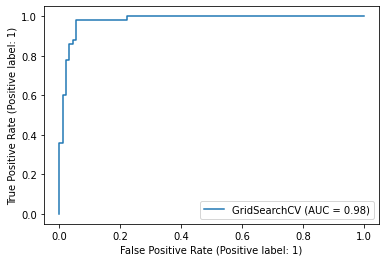

In [86]:
# Plot ROC curve and calculate the AUC(area under curve) metric
plot_roc_curve(gs_rf, X_test, y_test)

In [87]:
#Confusion Matrix
print(confusion_matrix(y_test, y_predicts))

[[85  5]
 [ 2 48]]


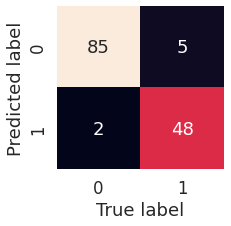

In [88]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_predicts):
  """
  Plot a confusion matrix using Seaborn's heatmap()
  """
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_predicts),
                  annot=True,
                   cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_predicts)

We have ROC, an AUC metric and a confusion matrix. Now let's get a classification report as well as cross-validated precision, recall and f1-score.

In [89]:
print(classification_report(y_test, y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        90
           1       0.91      0.96      0.93        50

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



Precision is the ability of the classifier not to label as positive a sample that is negative, and Recall is the ability of the classifier to find all the positive samples. The F-measure can be interpreted as a weighted harmonic mean of the precision and recall.

### Calculating the accuracy, precision, recall, and f1-score of our model using cross-validation[cross_val_score()]

Check best hyperparameters 

In [90]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 18}

Creating a new classifier with the best parameters

In [93]:
clf = RandomForestClassifier(max_depth=None,
                             min_samples_leaf=7,
                             min_samples_split=2,
                             n_estimators=18)

In [94]:
## Cross-validated accuracy

cv_accuracy = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_accuracy 

array([0.92142857, 0.90714286, 0.95      , 0.97841727, 0.96402878])

In [95]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.9442034943473793

In [96]:
## Cross-validated precision

cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.9214556414311719

In [97]:
## Cross-validated recall

cv_recall = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9170068027210885

In [98]:
## Cross-validated f1-score

cv_f1 = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9273537041719682

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

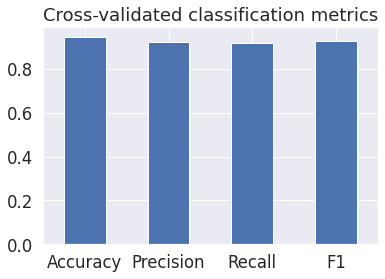

In [99]:
# Visualizing the cross-validated metrics 


cv_metrics = pd.DataFrame({"Accuracy":cv_accuracy,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)
plt.xticks(rotation=0)

In [100]:
# Find the feature importance of our best model
ideal_model.feature_importances_

array([0.00963494, 0.06585853, 0.27985858, 0.18533113, 0.07173794,
       0.00908255, 0.12035153, 0.16024975, 0.08928171, 0.00861335])

In [107]:
## functions to plot the features importances
def plot_features(columns, importances, n=10):
    df = (pd.DataFrame({"features": columns,
                        "features_importance": importances})
         .sort_values("features_importance", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["features_importance"][:10])
    ax.set_ylabel("features")
    ax.set_xlabel("feautures_importance")
    ax.invert_yaxis()

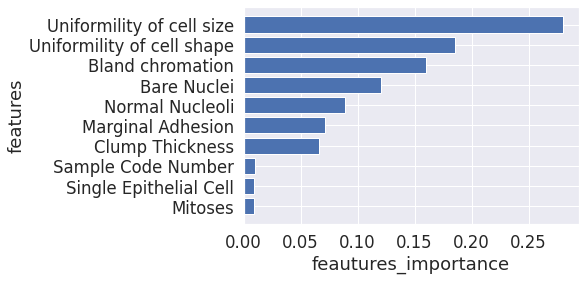

In [108]:
plot_features(X_train.columns, ideal_model.feature_importances_)

**Save the Machine Learning model**

After completion of the Machine Learning project or building the ML model need to deploy in an application. To deploy the ML model need to save it first. To save the Machine Learning project we can use the pickle or joblib package.

Here, we are using pickle.

In [ ]:
## Pickle
import pickle
 
# save model
pickle.dump(gs_rf, open('breast_cancer_detector.pickle', 'wb'))
 
# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))

pickle.dump(clf, open('breast_cancer_detector.pickle', 'wb'))
 
# predict the output
y_pred = breast_cancer_detector_model.predict(X_test)
 
# confusion matrix
print('Confusion matrix of Random Forest Classifier model: \n',confusion_matrix(y_test, y_predicts),'\n')
 
# show the accuracy
print('Accuracy of Random Forest Classifier model = ',accuracy_score(y_test, y_predicts))

Confusion matrix of Random Forest Classifier model: 
 [[85  5]
 [ 2 48]] 

Accuracy of Random Forest Classifier model =  0.95
